In [133]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import pickle as pkl

In [134]:
with open('data/WMT_365_days_ended_on_2020-10-25.csv', mode='r') as file:
    reader = csv.reader(file, delimiter=",")
    wmt_data = np.array(list(reader))

wmt_data_header = wmt_data[0]
wmt_data = wmt_data[1:]
# removing blank entries
wmt_data = np.delete(wmt_data, np.where(wmt_data[:,2] == '')[0], axis=0)
print(wmt_data_header)
n_data = wmt_data.shape[0]
print(wmt_data.shape)
print('n_data:', n_data)

['' 'date' 'label' 'high' 'low' 'average' 'volume' 'notional'
 'numberOfTrades' 'marketHigh' 'marketLow' 'marketAverage' 'marketVolume'
 'marketNotional' 'marketNumberOfTrades' 'open' 'close' 'marketOpen'
 'marketClose' 'changeOverTime' 'marketChangeOverTime']
(97026, 21)
n_data: 97026


# stock price

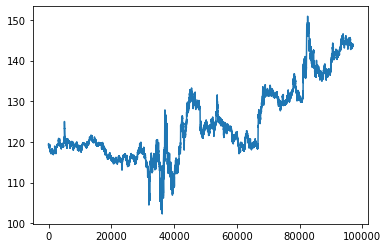

In [135]:
stock_average = wmt_data[:,11]

# replace empty value with previous known value
for i in range(n_data):
    if stock_average[i] == "":
        stock_average[i] = stock_average[i-1]
        
stock_average = stock_average.astype("float")

plt.plot(stock_average)

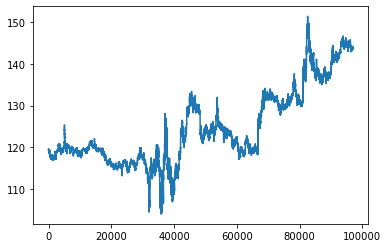

In [136]:
stock_high = wmt_data[:,9]

# replace empty value with previous known value
for i in range(n_data):
    if stock_high[i] == "":
        stock_high[i] = stock_high[i-1]
        
stock_high = stock_high.astype("float")

plt.plot(stock_high)

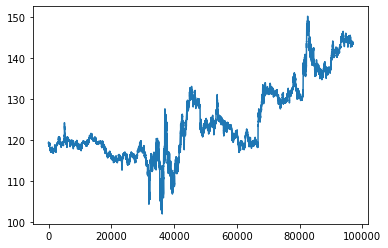

In [137]:
stock_low = wmt_data[:,10]

# replace empty value with previous known value
for i in range(n_data):
    if stock_low[i] == "":
        stock_low[i] = stock_low[i-1]
stock_low = stock_low.astype("float")

plt.plot(stock_low)

# volume

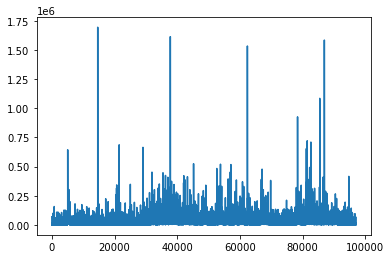

In [138]:
stock_volume = wmt_data[:,12].astype("float")
plt.plot(stock_volume)

# time of the date
* todo: add date of the week?

In [139]:
import datetime

In [140]:
base_time = datetime.datetime.strptime(wmt_data[0,2], '%I:%M %p')

stock_time = np.zeros((n_data))
for i in range(n_data):
    try:
        this_time = datetime.datetime.strptime(wmt_data[i,2], '%I:%M %p')
    except ValueError:
        this_time = datetime.datetime.strptime(wmt_data[i,2], '%I %p')
    stock_time[i] = (this_time - base_time).total_seconds() / 60.0

(97026,)


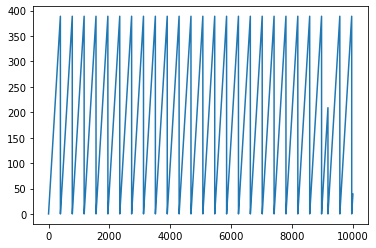

In [141]:
plt.plot(stock_time[:10000])
print(stock_time.shape)

# labeling data

In [168]:
# label as two numbers, first being buy, second being sell, -1 means error, 0 means no, 1 means yes
# exp: (0,1) means the price goes down in the future, so sell
# exp: (1,0) means the price goes up in the future, so buy
# exp: (0,0) means the price is stable in the future
# exp: (1,1) means the price fluctuates in the future

# look at the future prices between +future_1 minute and + future_2 minute, 
# if there are future price > current price * (1+thresh), than label it as buy
# if there are future price < current price * (1-thresh), than label it has sell

thresh = 0.03
future_1 = 10
future_2 = 1000

stock_labels = np.ones((n_data,2)) * -1

for i in range (n_data-future_2):
    if np.max(stock_average[i+future_1:i+future_2]) > stock_average[i]*(1+thresh):
        stock_labels[i,0] = 1
    else:
        stock_labels[i,0] = 0
        
    if np.min(stock_average[i+future_1:i+future_2]) < stock_average[i]*(1-thresh):
        stock_labels[i,1] = 1
    else:
        stock_labels[i,1] = 0

In [169]:
print('action frequency:', np.sum(stock_labels)/n_data)

action frequency: 0.2851915981283367


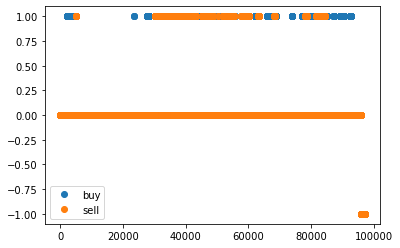

In [174]:
plt.plot(stock_labels[:,0],'o', label='buy')
plt.plot(stock_labels[:,1],'o', label='sell')
plt.legend()